# Advanced Machine Learning - Project 1 Report
## _Pacyna Paulina, Wójcik Mateusz_

# Preparation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plot_measures import plot_measures
from algorithms_comparison import plot_algorithms_comparison
from parameters_influence import plot_GD_SGD
import warnings
warnings.filterwarnings('ignore')

# Introduction

The purpose of this project is to implement a logistic model from scratch and to test the performance of different optimisation algorithms. We begin with preparing the data for analysis, then   we implement 3 optimization algorithms for training the model, and finally we assess the result using statistical measures.

# Datasets

Since the model needs to be trained and tested, there is a need to prepare some data. We collected 5 datasets:
 * **candies** - dataset concerning production of candies. Sample questions addressed by the variables: *Does it contain chocolate?, Is it fruit flavored?, Is there caramel in the candy?, Does it contain peanuts, peanut butter or almonds?, Does it contain nougat?*. The target variable describes percentage of people who liked this candie type.
 * **breast cancer** - dataset describing health state of a patients suffering from breast cancer. The target variable describes if the cancer is maligant.
 * **bankrupcy** - this is a dataset from a recruiting task from a consulting firm. Variables include information of each candidating company, for example income, marketing statistics, ratings, sector number of employees, etc. The target variable represents information about bankrupcy. This dataset is significantly larger than other.
 * **nba** - dataset on all the NBA finals results and NBA Regular Seasons MVP.
 * **wine** - dataset related to red and white variants of the Portuguese "Vinho Verde" wine. 
  

The first step was downloading the data and conversion of types. We saved the initially preprocessed data under directory `data/before preprocessing`. Next step was to replace missing data with mean value of each variable. Then we analyzed correlation matric for each dataset and we dropped the most correlated variables.

## Measures

We introduce 3 measures of fit: *accuracy*, *precission* and *recall*. The implementation can be found in `log_regression.py` file.
$$accuracy(y,\hat{y}) = \frac{1}{n}\sum_i I_{\big\{y_i=\hat{y_i}\big\}}$$

$$precision(y,\hat{y}) = \frac{\sum_i I_{\big\{y_i=\hat{y_i}=1\big\} }}{\sum_i I_{\big\{\hat{y_i}=1\big\} }}$$

$$recall(y,\hat{y}) = \frac{\sum_i I_{\big\{y_i=\hat{y_i}=1\big\} }}{\sum_i I_{\big\{{y_i}=1\big\} }}$$

## Model

The main component of our model is the `LogisticModel` class present in `log_regression.py` file. It includes 3 training methods - `GD`, `SGD` and `IRLS`, method `fit` which given a dataset predicts the results and measures like `log_likelihood` and `R2_measure`.

## Loglikelihood and goodness of fit

We have examined how loglikelihood and other measures are affected by number of iterations. Increasing number of iterations makes a difference mainly for smaller number of iterations.

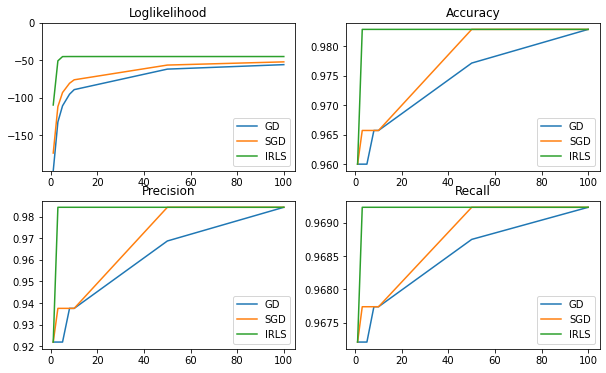

In [4]:
plot_measures()

## Learning Rate and Batch Size Influence

We have checked how the learning rate influences both log-likelihood function and accuracy for __GD__ and __SGD__. We have also tried to examine the influence of batch size on the same measures for __SGD__ algorithm. 

For the first experiment, we performed only _5_ iterations of the algorithms and we set the _batch size_ to _16_. For the second experiment we again performed _5_ iterations of __SGD__ with the learning rate set to _0.1_.

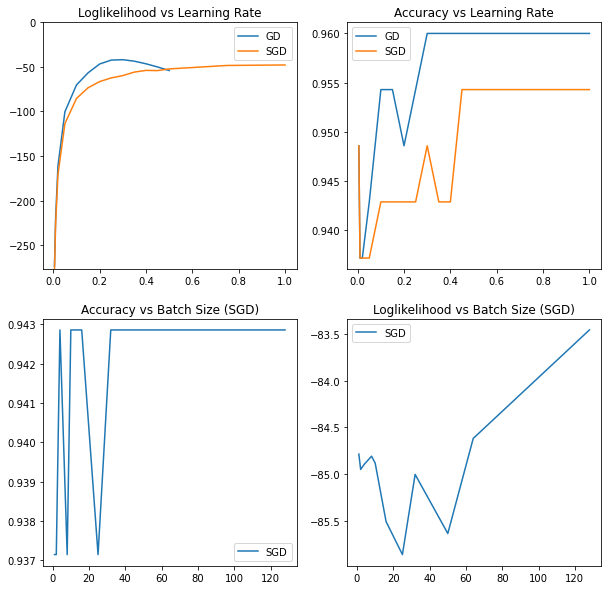

In [11]:
plot_GD_SGD(figsize=(10,10))

We can see quite noticeable tendence in the change of the values of the log-likelihood function. Note that when we increase the value of learning rate, the value of the function increases for both __GD__ and __SGD__ at first. Then, we can note a global maximum for __GD__, while the values for __SGD__ appear to increase while flattening at the same time.

The accuracy seems to improve with increasing learning rate for both __GD__ and __SGD__. This may be the case, because we chose to perform only _5_ iterations of the algorithms. Therefore, the influence on the weights is higher and the models learn _faster_. 

Increasing batch size appears to increase the value of log-likelihood function, even for not that huge amount of data (699 observations). On the other hand, the accuracy variates and then stabilizes.

## Stopping Rule

Several different methods of stopping rules for the algorithms are possible, but we decided to choose one of the most universal ones which is also used for training neural networks such as _Multilayer Perceptron_. Each algorithm was started with a vector of weights consisting only zeros (this approach also helped __IRLS__ converge more effectively). In each iteration of the algorithm, we compared the new weights with the previous ones by calculating the norm of the difference of weights vectors. With previously assigned _epsilon_, we checked if the norm is less than the _epsilon_. If that was the case, we stopped the algorithm printing the number of iterations.

$$ \left\|w_{n+1} - w_n \right\| < \epsilon,\quad\text{where }n+1\text{ is the number of current iteration.} $$

## Comparison With Other Classification Algorithms

We compared the logistic model created by us (concerning all the implemented optiomization algorithms) againts other popular models, like LDA, QDA and KNN. We used the **breast cancer** for the computation. Below we present the results of the comparison:

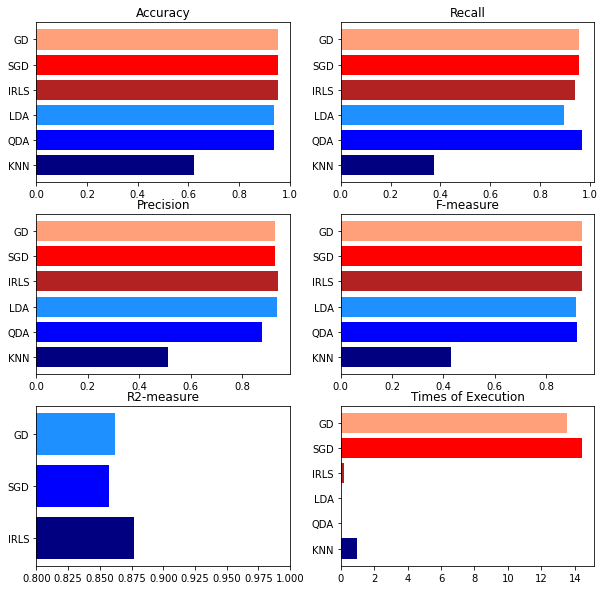

In [5]:
plot_algorithms_comparison(figsize=(10, 10))

Note that the first 4 measures are pretty similar for __GD__, __SGD__, __IRLS__, and __LDA__. __QDA__ seems to perform slightly worse on this dataset, while __KNN__ has the worst results. This might be caused by high dimensionality of the data. We can also see that __IRLS__ reaches the highest _R2 measure_, while both __GD__ and __SGD__ are again very similar.

Times of execution for the first 3 algorithms may prove to be significantly higher, because these algorithms were implemented using only basic functions from _numpy_ module. Although __IRLS__ uses algorithm of calculating pseudo-inverse/inverse matrix, its time of execution appears to be significantly slower in comparison with __GD__ and __SGD__. 

For __KNN__ algorithm, we used very basic optimization for choosing the most accurate _k_ by checking accuracies of the model for different values from range 1 to 50. This might have slowed the execution of this classification algorithm.

We would like to also mention the method for calculating the _R2 measure_. To calculate this measure, we prepared the _null model_ for the given learning data. It is a model that consists only the intercept. We treated such a model as a typical logistic regression model with the weights equal to _0_ except for the intercept.

$$ \ln \dfrac{\pi}{1-\pi} = \beta_0,\quad\text{where }\pi = \mathbb{P}(Y = 1). $$

Therefore, the only non-zero weight was calculated as a natural logarithm of the odds of belonging to class _1_. We estimated the probability of belonging to this class by calculating the average value of _Y_-variable.

### Potential Problems in IRLS Algorithm

Once we tested the algorithms on different datasets, we noticed that sometimes __IRLS__ converges to weights that make activation function be equal exactly to _0_ or _1_. This behaviour made it impossible to calculate the logarithm of likelihood function and consequently, we were unable to calculate the _R2 measure_ for such models.

Using __IRLS__ algorithm for optimization sometimes resulted in obtaining singular matrix that was intended to be inversed. We thought of two approaches: 
* checking if the matrix appears to be singular, stopping the algorithm, and using the most recent weights
* calculating the Moore-Penrose pseudo-inverse of a matrix using its singular-value decomposition (SVD) which is a generalisation of the inverse.

We decided to follow the second approach and the results were satisfying for IRLS based on the above plots.